In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/guenerets/Desktop/GA/kickstarters.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# 1: EDA

### Starting by cleaning up the dataset

In [2]:
df.shape

(378661, 15)

#### Chasing null values

In [3]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [4]:
#let's get rid of these null values.
#usd pledged and usd pledged real are redundant- let's keep the one with non missing values
#let's also drop the 4 campaigns without name
df = df.dropna()

In [5]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
df['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [7]:
#let's get rid of everything that isn't failed or successful - 
# even though we could argue that canceled/suspended could be added to failed.
df = df[df['state'].isin(['failed', 'successful'])]

#### Looking at the date range

In [8]:
#what time period does my data cover?
df['launched'].sort_values().head(5)

169268    2009-04-21 21:02:48
322000    2009-04-23 00:07:53
138572    2009-04-24 21:52:03
325391    2009-04-25 17:36:21
122662    2009-04-27 14:10:39
Name: launched, dtype: object

In [9]:
df['launched'].sort_values().tail(5)

329616    2017-12-23 10:14:21
43850     2017-12-26 13:00:24
80946     2017-12-27 03:52:38
111813    2017-12-28 01:48:58
339929    2017-12-29 03:22:32
Name: launched, dtype: object

In [10]:
#rather than launched date and deadline, let's calculate the duration of the campaign

df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

# new column showing the total number of days per kickstarters
df['duration'] = df['deadline'] - df['launched']

#keep number of days only
df['duration'] = df['duration'].dt.days

In [11]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,34


In [12]:
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
duration                     int64
dtype: object

### Now for some proper EDA

#### Starting with country

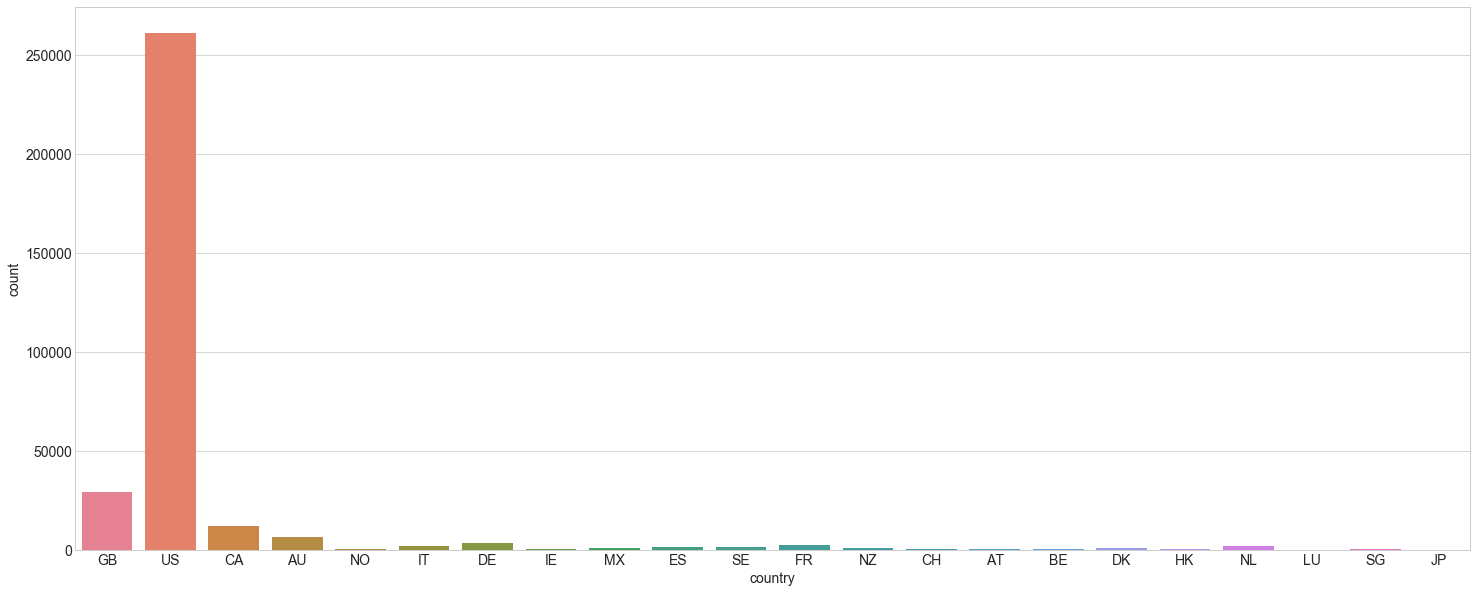

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
presentation_palette = ["#89018F", "#25A032"]
sns.set_palette(presentation_palette)
%matplotlib inline

plt.rcParams['figure.figsize'] = (25, 10) 
plt.rcParams['font.size'] = 14

sns.countplot(x='country',data=df, palette='husl');

The vast majority of the kickstarters being US-based, it seems a good idea to focus on just the US

In [14]:
# Getting rid of non US-based kickstarters
df = df[df['country'] == 'US']

#### How about backers?

In [15]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
count,2.613580e+05,2.613580e+05,2.613580e+05,261358.000000,2.613580e+05,2.613580e+05,2.613580e+05,261358.000000
mean,1.075170e+09,3.934893e+04,1.048204e+04,122.745655,8.335942e+03,1.048204e+04,3.934893e+04,33.186939
std,6.192024e+08,1.035441e+06,1.046231e+05,1039.320806,9.098122e+04,1.046231e+05,1.035441e+06,13.004661
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000
25%,5.382867e+08,2.000000e+03,5.600000e+01,2.000000,3.500000e+01,5.600000e+01,2.000000e+03,29.000000
50%,1.076273e+09,5.000000e+03,9.100000e+02,17.000000,6.260000e+02,9.100000e+02,5.000000e+03,29.000000
75%,1.611150e+09,1.500000e+04,5.020000e+03,66.000000,3.861000e+03,5.020000e+03,1.500000e+04,36.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.000000e+08,91.000000


wow, there is a lot of variance here for goal, pledged and backers. Let's explore

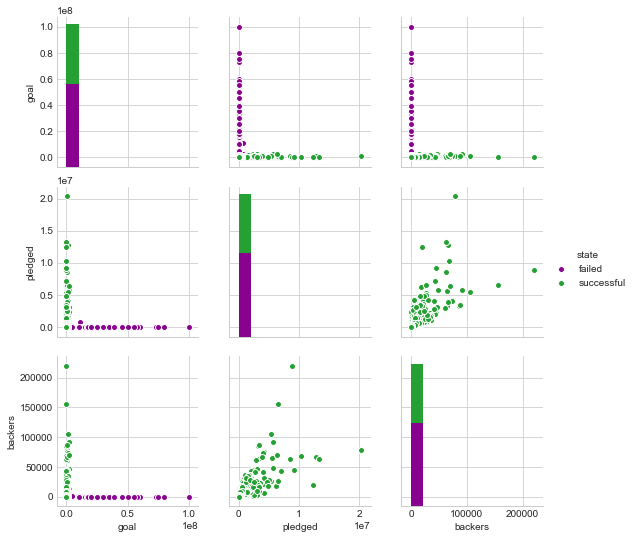

In [16]:
g= sns.pairplot(vars=df[['goal', 'pledged', 'backers']], data=df, hue='state');

The amount pledged and the number of backers look correlated (probably logical). It's harder to tell for goal

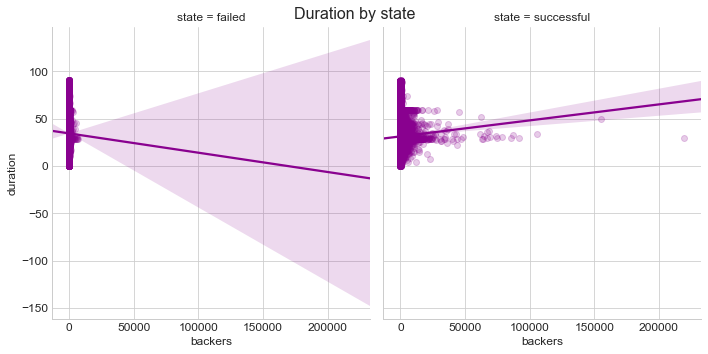

In [17]:
# let's look at backers by duration:

plt.rcParams['figure.figsize'] = (30, 10) 
plt.rcParams['font.size'] = 12

g = sns.lmplot(x='backers', y='duration', data=df, col='state', aspect=1, scatter_kws={'alpha':0.2})
fig = g.fig
fig.suptitle('Duration by state', fontsize=16);

Looks like we have a couple of outliers there, with a few successful campaigns gathering a lot of backers.
Failed campaigns never seem to reach many backers

In [18]:
#Who are these outliers?
df[df['backers'] > 150000]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
75900,1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.0,2016-08-30 22:02:09,6465690.30,successful,154926,US,13770.00,6465690.30,15000.0,50
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0,30


In [19]:
#let's get rid of them:

df = df[df['backers'] < 150000]

#### Now, let's explore goals more closely

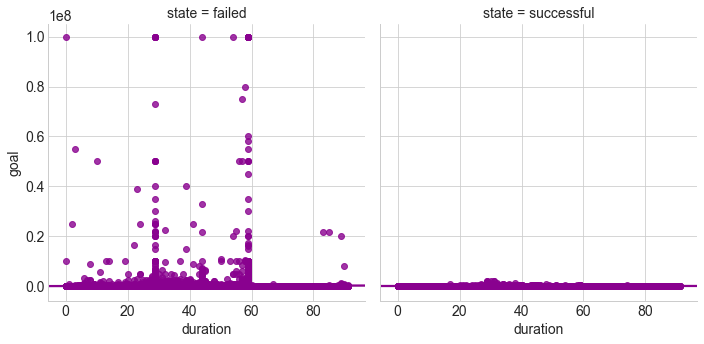

In [20]:
plt.rcParams['figure.figsize'] = (25, 10) 
plt.rcParams['font.size'] = 14

g= sns.lmplot(x= 'duration', y='goal', col='state', data=df);

It looks like ambitious kickstarters overwhelmingly fail

In [21]:
# what is the highest ever goal?
df['goal'].max()

100000000.0

In [22]:
# And what is the most ambitious, successful goal?
df[df['state']=='successful']['goal'].max()

2000000.0

No successfull kickstarter over 2m, while the values go up to $100m

In [23]:
df[df['goal']> 2000000].shape

(329, 16)

In [24]:
df[df['goal']<= 2000000]['state'].value_counts()

failed        151730
successful    109297
Name: state, dtype: int64

Getting rid of them will keep the classes balanced and avoid skew. Let's focus on kickstarters with goals < $2m

In [25]:
df = df[df['goal']<= 2000000]

In [26]:
# let's see what are these sucessful kickstarters
df[(df['state']=='successful') & (df['goal'] == 2000000)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
89481,1454565733,Bring Back MYSTERY SCIENCE THEATER 3000,Television,Film & Video,USD,2015-12-12,2000000.0,2015-11-10 16:49:32,5764229.38,successful,48270,US,5764229.38,5764229.38,2000000.0,31
134462,1682353635,Camelot Unchained,Video Games,Games,USD,2013-05-02,2000000.0,2013-04-02 17:56:11,2232933.03,successful,14873,US,2232933.03,2232933.03,2000000.0,29
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.0,30
171322,1871494789,WISH I WAS HERE,Narrative Film,Film & Video,USD,2013-05-24,2000000.0,2013-04-24 11:57:04,3105473.10,successful,46520,US,3105473.10,3105473.10,2000000.0,29
368573,947809001,Shenmue 3,Video Games,Games,USD,2015-07-18,2000000.0,2015-06-16 03:51:04,6333295.77,successful,69320,US,6333295.77,6333295.77,2000000.0,31


In [27]:
#what are the smallest goals?
df[df['goal'] < 1]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
226171,219760504,RocknRoll NoisePollution,Documentary,Film & Video,USD,2011-07-19,0.50,2011-07-12 15:59:39,0.0,failed,0,US,0.0,0.0,0.50,6
304489,620302213,LOVELAND Round 6: A Force More Powerful,Conceptual Art,Art,USD,2009-12-04,0.01,2009-11-25 07:54:49,100.0,successful,6,US,100.0,100.0,0.01,8
370401,9572984,Nana,Shorts,Film & Video,USD,2012-03-16,0.15,2012-01-25 07:23:19,0.0,failed,0,US,0.0,0.0,0.15,50


Hard to tell from the info we have but potentially small goal kickstarters are not serious, just like some of the bigger ones.
We'll have to keep them in

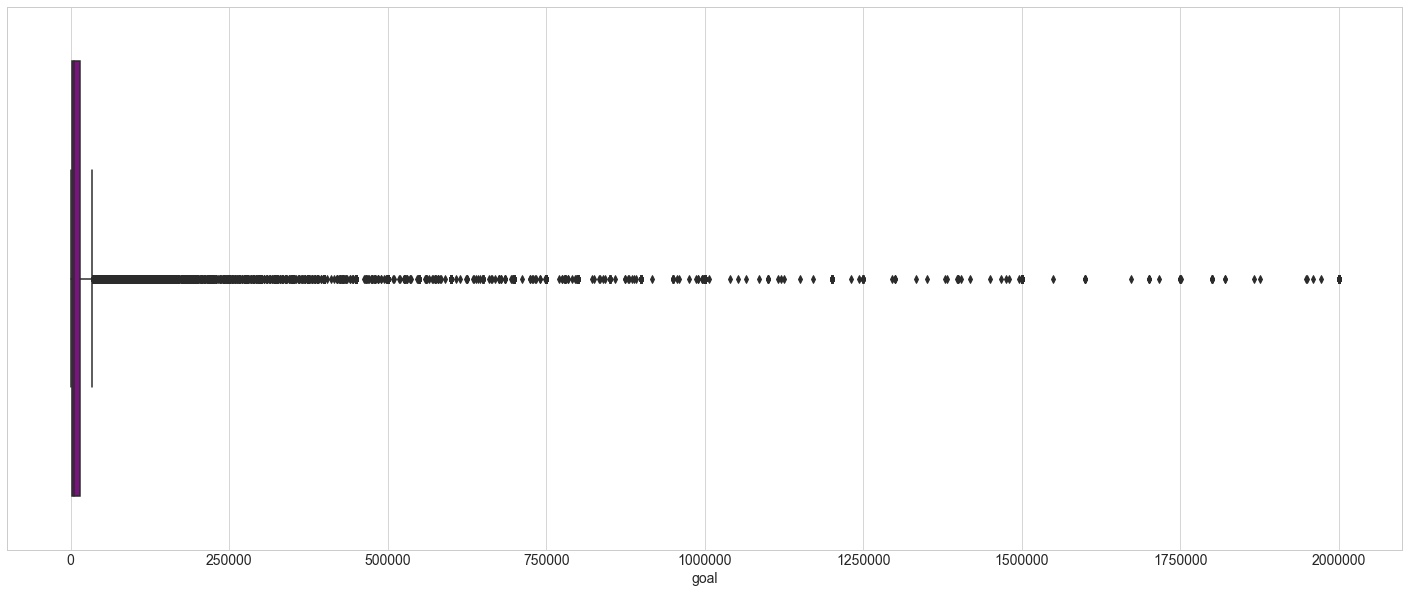

In [28]:
# let's visualise the goals
sns.boxplot(df['goal']);

Still a lot of outliers.

In [29]:
#let's calculate the IQR

import numpy as np
q75, q25 = np.percentile(df['goal'], [75 , 25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

print(min, max)

-17500.0 34500.0


Do small kickstarters differ from bigger ones? Let's split them out so we can compare

In [30]:
# Creating 2 categories of kickstarters
df.loc[df["goal"] <= 34500, "size"] = 'small'
df.loc[df["goal"] > 34500, "size"] = 'big'

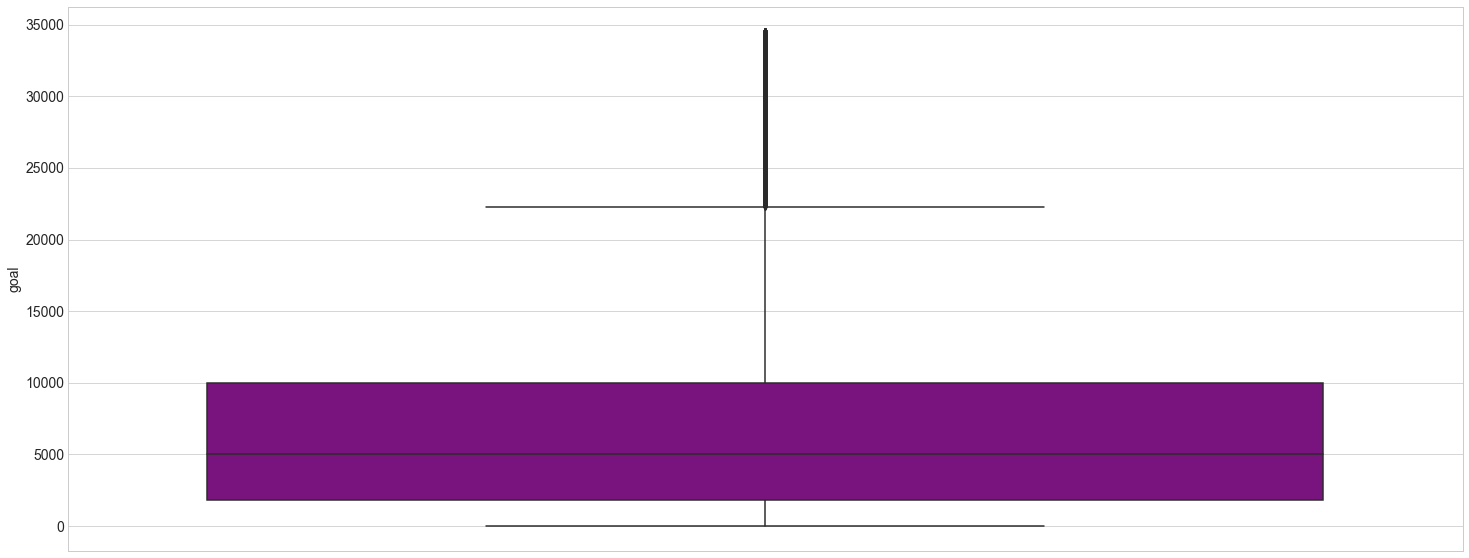

In [31]:
#let's look again
sns.boxplot(y ='goal', data=df[df['size'] == 'small']);

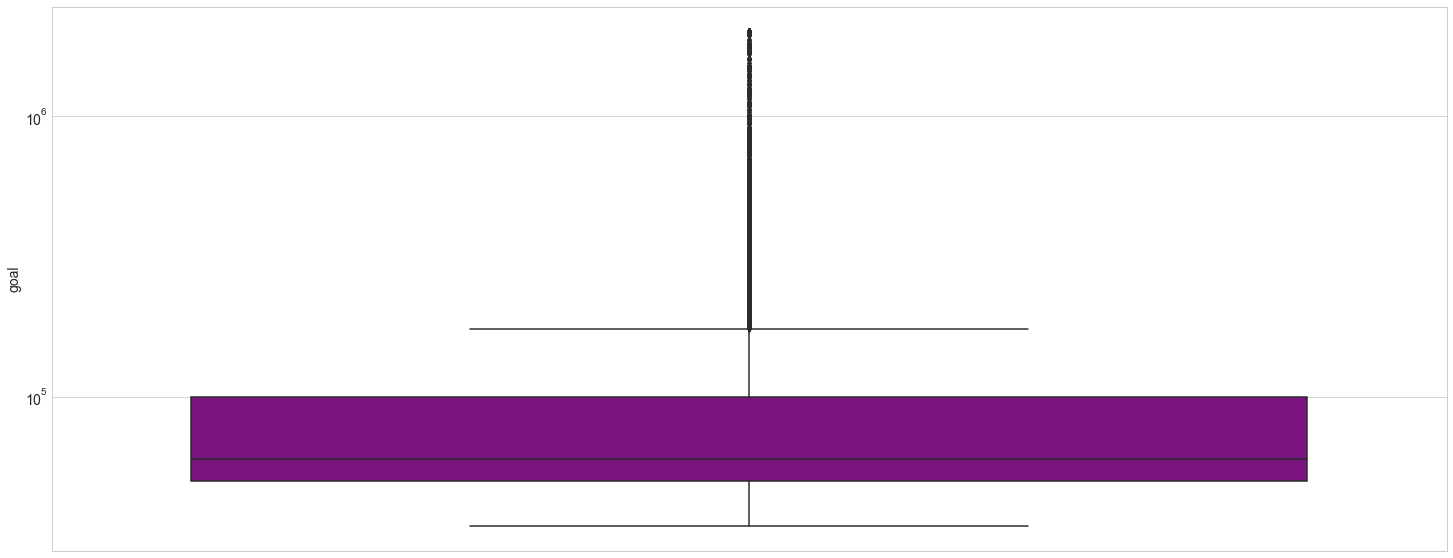

In [32]:
g= sns.boxplot(y ='goal', data=df[df['size']== 'big'])
g.set_yscale('log')

Still a lot of outliers, but let's leave them in for now- we'll see how it impacts the machine learning process

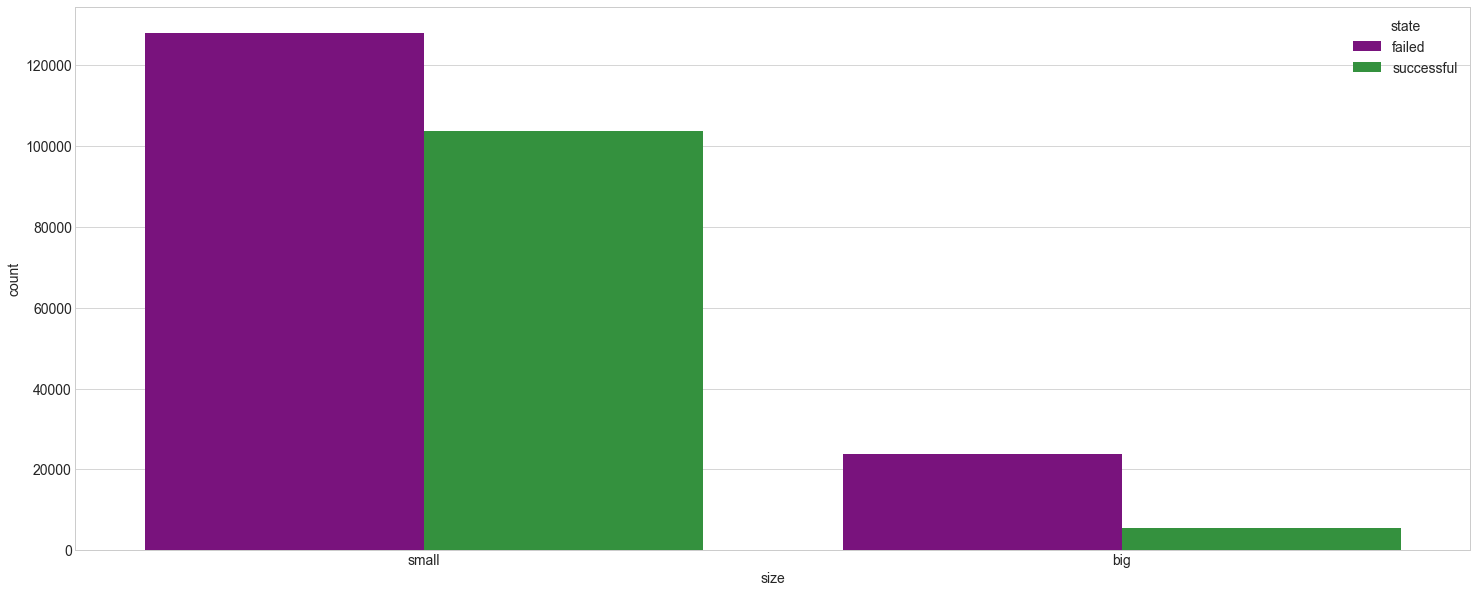

In [33]:
# what is the proportion of success/failure by size?

sns.countplot(x='size', hue='state', data=df);

Big kickstarters are much more likely to fail.

#### Now, how do backer and pledge look like when we split the dataset depending on goal?

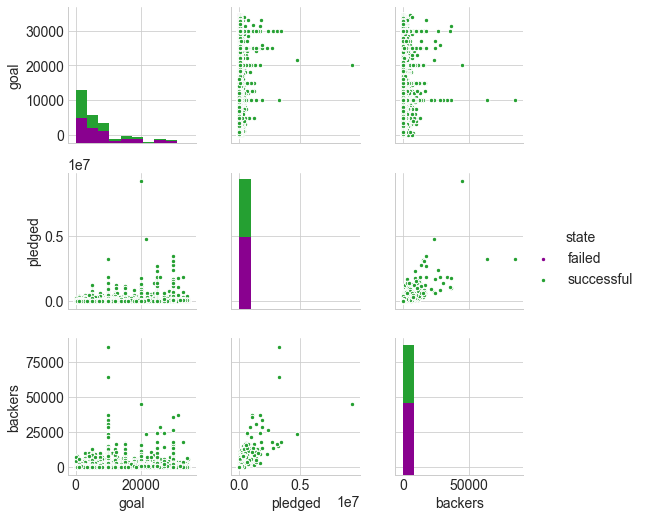

In [34]:
#small dataset:
sns.pairplot(vars=df[['goal', 'pledged', 'backers']], 
             data=df[df['size']== 'small'], hue='state', plot_kws={"s": 20});

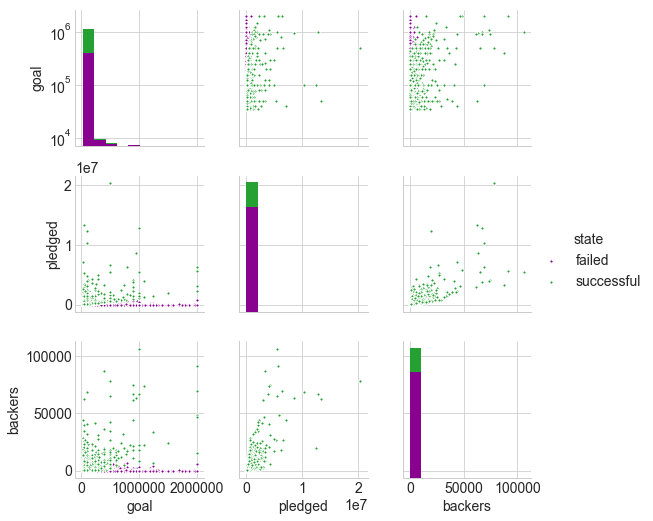

In [35]:
#big dataset, using a log scale for visibility
g= sns.pairplot(vars=df[['goal', 'pledged', 'backers']], 
                data=df[df['size']== 'big'], hue='state', plot_kws={"s": 10})
g.fig.get_axes()[0].set_yscale('log')

Pledge and backers are correlated for the smaller campaigns; it's harder to tell for the bigger ones.

#### How about duration?

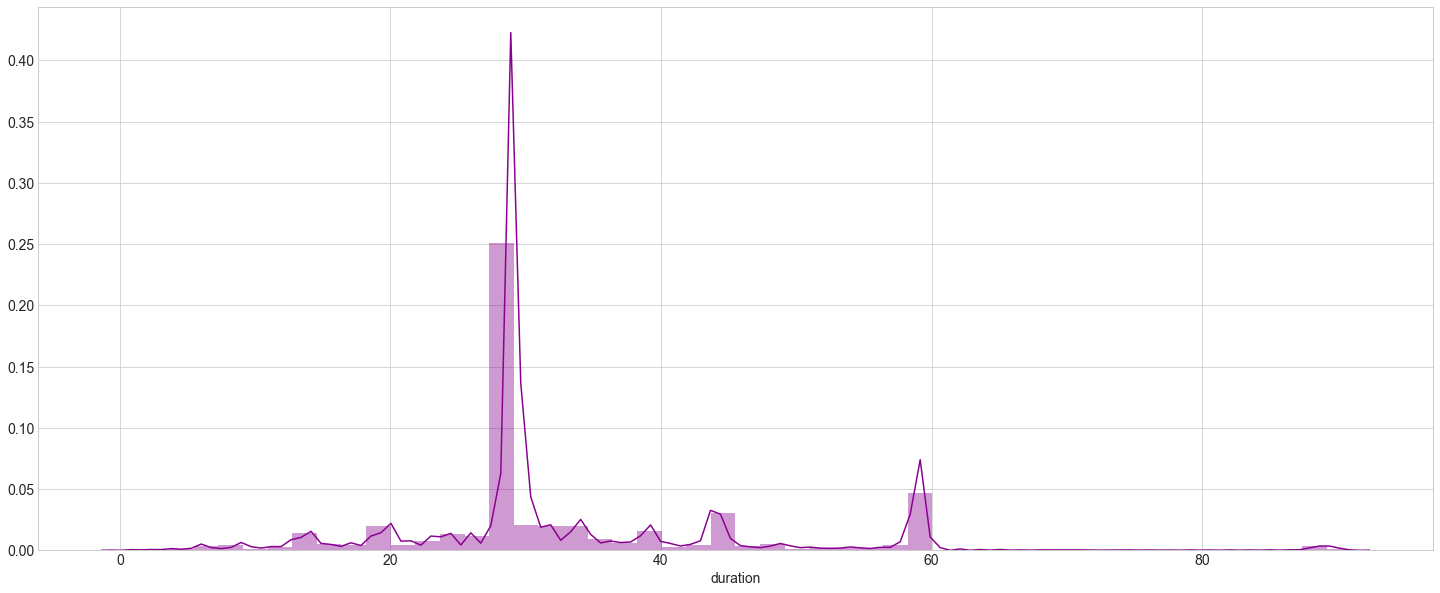

In [36]:
plt.rcParams['figure.figsize'] = (25, 10) 
plt.rcParams['font.size'] = 14

sns.distplot(df['duration']);

In [37]:
df['duration'].describe()

count    261027.000000
mean         33.174867
std          12.995614
min           0.000000
25%          29.000000
50%          29.000000
75%          36.000000
max          91.000000
Name: duration, dtype: float64

So the average campaign is just over a month, with the longest being 3-month long

In [38]:
df[df['duration']< 33]['state'].value_counts()

failed        102709
successful     80381
Name: state, dtype: int64

In [39]:
df[df['duration']>=33]['state'].value_counts()

failed        49021
successful    28916
Name: state, dtype: int64

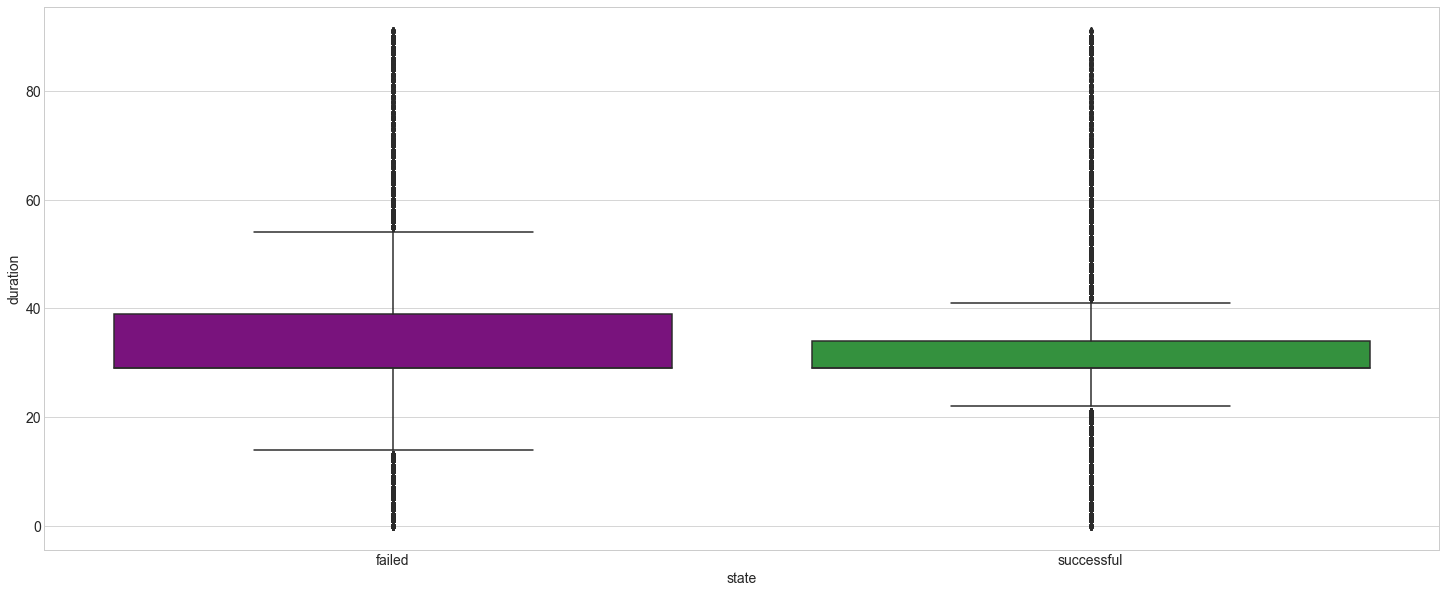

In [40]:
sns.boxplot(x='state', y='duration', data=df);

Longer kickstarters are more likely to succeed

In [41]:
# how many 0s?
df[df['duration'] == 0].shape

(64, 17)

In [42]:
df[df['duration'] == 0]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,size
937,1004692921,Musical Help for Trouble with Numbers (one of ...,Classical Music,Music,USD,2016-02-19,500.0,2016-02-18 04:29:22,0.00,failed,0,US,0.00,0.00,500.0,0,small
20368,1103482181,The Next Winged Queen (number 4!),Art,Art,USD,2016-04-02,8888.0,2016-04-01 08:38:27,7670.00,failed,86,US,7670.00,7670.00,8888.0,0,small
22391,1113590741,To build a forcible entry prop,Interactive Design,Design,USD,2015-02-22,500.0,2015-02-21 04:17:01,51.00,failed,2,US,51.00,51.00,500.0,0,small
23300,1118279594,Poster: All 3D Printers Made,Art,Art,USD,2014-07-16,20.0,2014-07-15 15:20:08,20.00,successful,1,US,20.00,20.00,20.0,0,small
34578,1175306310,Björk Swan Dress T-Shirt,Conceptual Art,Art,USD,2012-02-17,180.0,2012-02-16 17:56:27,472.00,successful,45,US,472.00,472.00,180.0,0,small
37608,1190829324,SOLE TOTES,Accessories,Fashion,USD,2016-07-24,30000.0,2016-07-23 21:07:12,0.00,failed,0,US,0.00,0.00,30000.0,0,small
44783,1227406138,Foldable Shoes for Purse- that won't get it di...,Fashion,Fashion,USD,2011-11-29,200.0,2011-11-28 11:35:18,0.00,failed,0,US,0.00,0.00,200.0,0,small
62250,131654802,Lean Movie: the minimum-viable film,Experimental,Film & Video,USD,2016-04-02,100.0,2016-04-01 06:02:03,20.00,failed,1,US,20.00,20.00,100.0,0,small
65731,1334283643,Freshman Survival Guide,Publishing,Publishing,USD,2012-03-31,50.0,2012-03-30 22:11:20,70.00,successful,2,US,70.00,70.00,50.0,0,small
70685,1359826889,"""Insert Title Here"" a 24 hour comic day comic",Comics,Comics,USD,2016-10-02,20.0,2016-10-01 00:28:42,49.00,successful,7,US,49.00,49.00,20.0,0,small


In [43]:
df[df['duration'] == 0]['state'].value_counts()

failed        41
successful    23
Name: state, dtype: int64

Again, hard to tell from the titles whether these should be taken out...let's leave them in

#### Finally, let's look at category

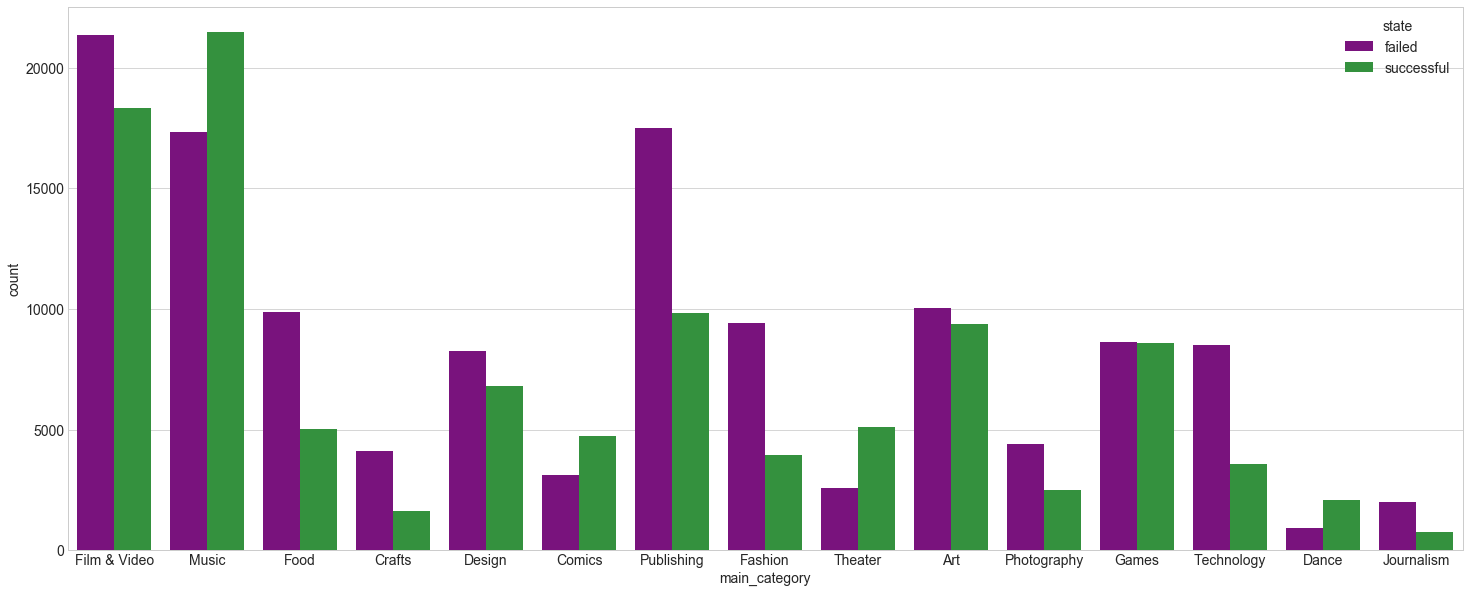

In [44]:
sns.countplot(x='main_category', hue='state', data=df[df['size']=='small']);

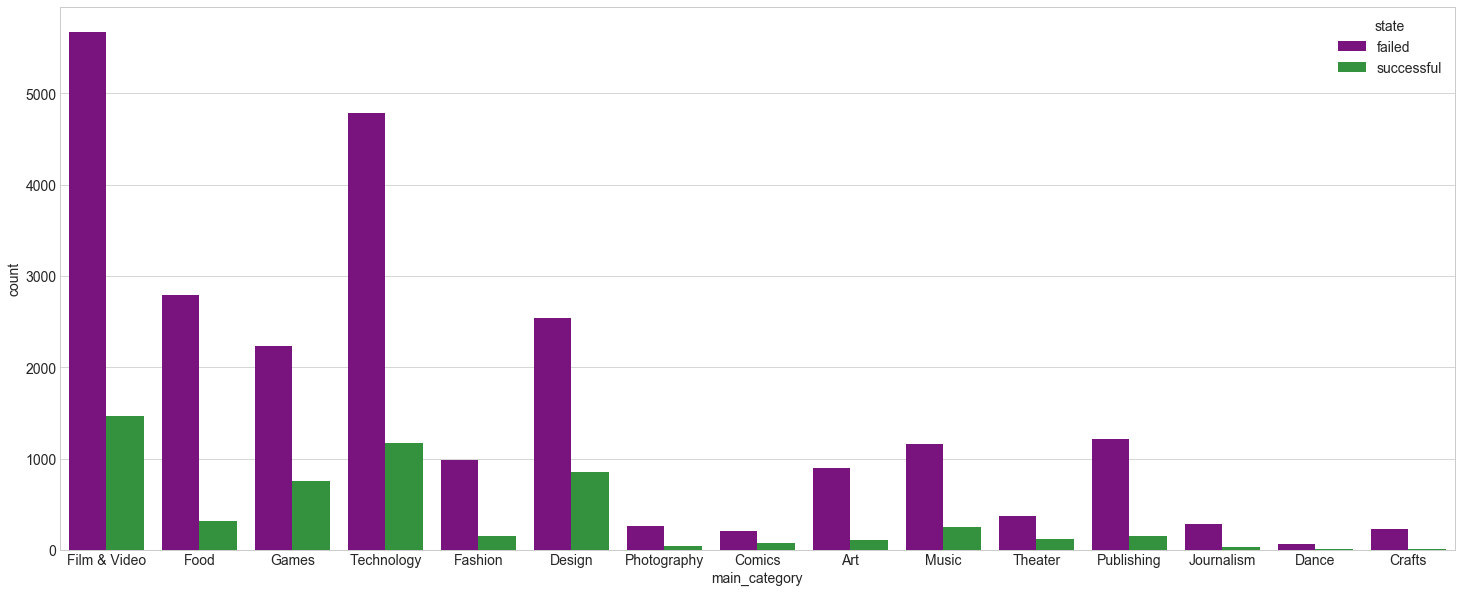

In [45]:
sns.countplot(x='main_category', hue='state', data=df[df['size']=='big']);

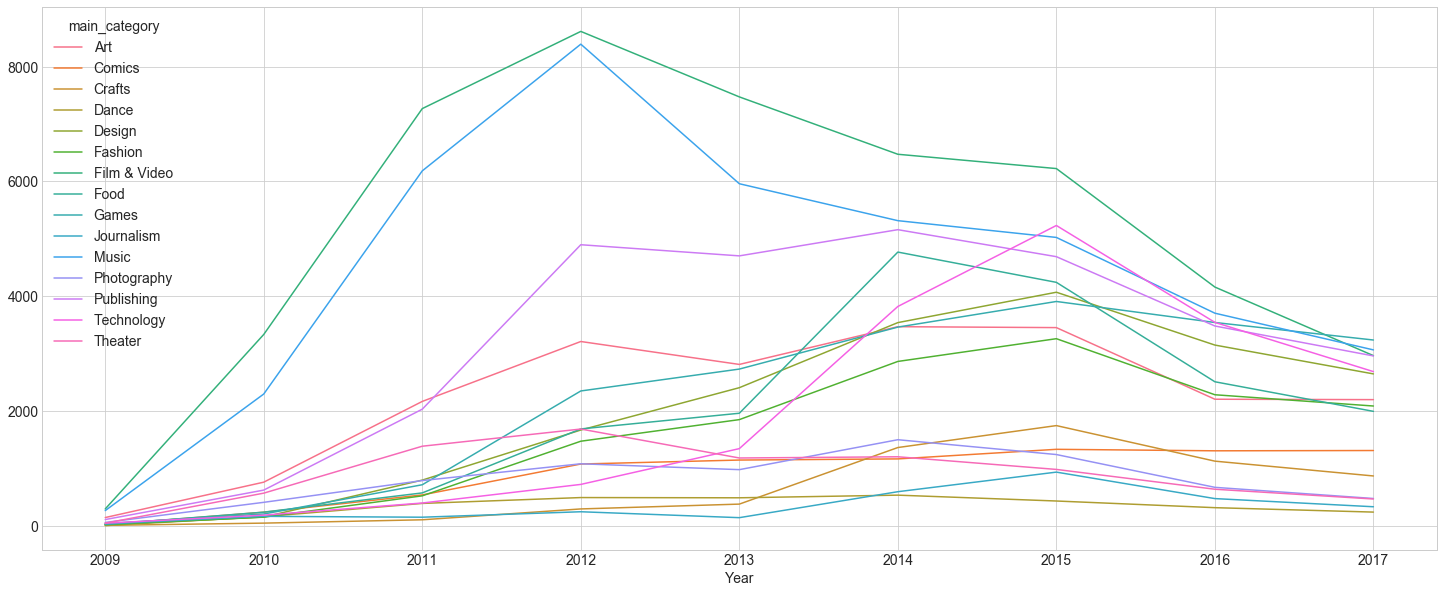

In [46]:
# Let's plot the categories by year

sns.set_palette('husl',15)
df["Year"] = df["launched"].dt.year
df_time = df.groupby('main_category')['Year'].value_counts()
df_time.unstack().T.plot();

Kickstarters picked in 2012, with 2017 seeing only as many as 2010.
Film & Video and Music have been the biggest categories at the start, but Tech has been rising steadily
as well as Games.
The total number of kickstarters has dropped since 2012 - which corresponds to the fast multiplication of alternative crowdfunding solutions since 2013

#### Let's also look at the failure/success rate by year

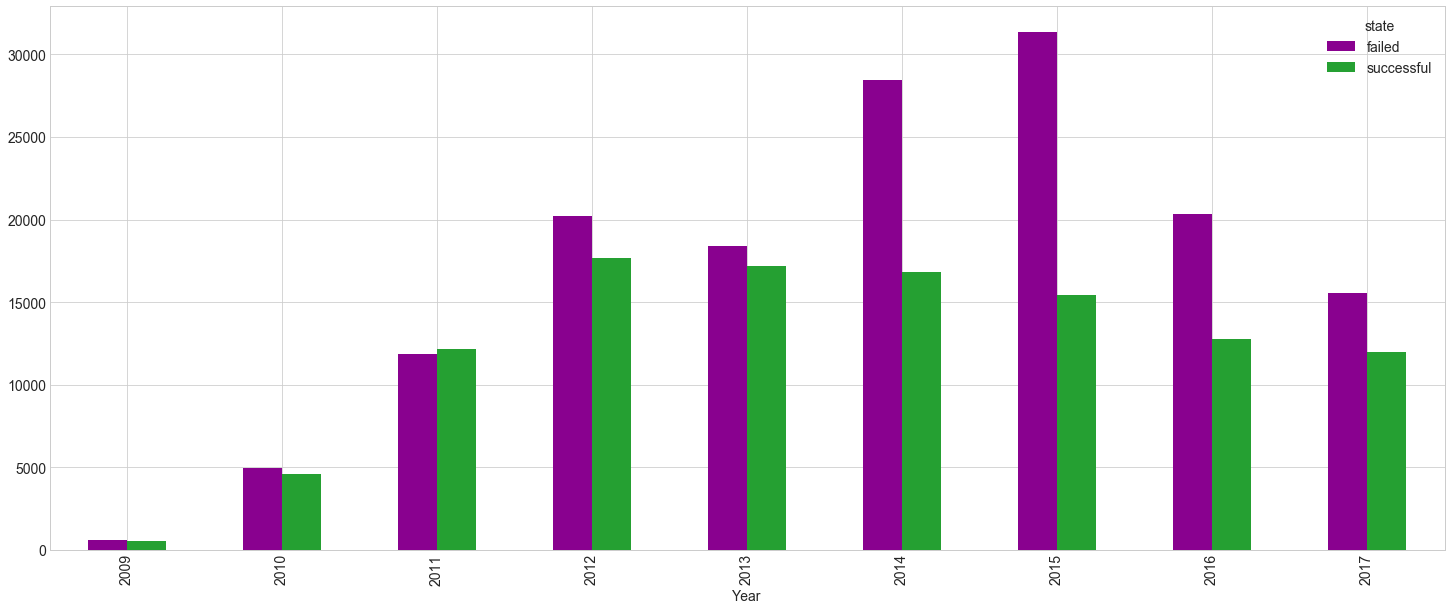

In [47]:
sns.set_palette(presentation_palette)
df_time_2 = df.groupby('state')['Year'].value_counts()
df_time_2.unstack().T.plot(kind='bar');

So we started with a nearly equal split from 2009 to 2013, then saw a lot of projects failing between 2013 and 2015, before seeing a drop in the last 2 years.
Interesting to note that the number of successful kickstarters stayed pretty much stable since 2012.

# 2: Machine learning

## a- Clustering for dimension reduction

#### Cleaning up categorical values

In [48]:
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
duration                     int64
size                        object
Year                         int64
dtype: object

In [49]:
# do I select categories or main categories? Let's look at categories

df.category.value_counts()

Product Design       13727
Documentary          12341
Music                10918
Shorts                9530
Tabletop Games        8938
Food                  8823
Film & Video          7368
Fiction               6835
Video Games           6239
Nonfiction            6172
Fashion               6151
Art                   5908
Theater               5876
Rock                  5650
Children's Books      5166
Indie Rock            5008
Apparel               4514
Webseries             4478
Photography           4347
Narrative Film        4241
Comics                4093
Technology            3944
Country & Folk        3885
Publishing            3844
Apps                  3258
Crafts                3207
Hip-Hop               3157
Web                   2650
Pop                   2631
Design                2526
                     ...  
Textiles               170
Puzzles                161
Couture                144
Makerspaces            142
Movie Theaters         140
Animals                138
B

There are too many of those- let's keep main category only

In [50]:
# get rid of country (only US), currency (only $), and category (too many)

df = df.drop(['country', 'currency', 'category'], axis=1)

In [51]:
df.columns

Index(['ID', 'name', 'main_category', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real', 'duration', 'size', 'Year'],
      dtype='object')

Now let's have a look at the correlation matrix for numerical features

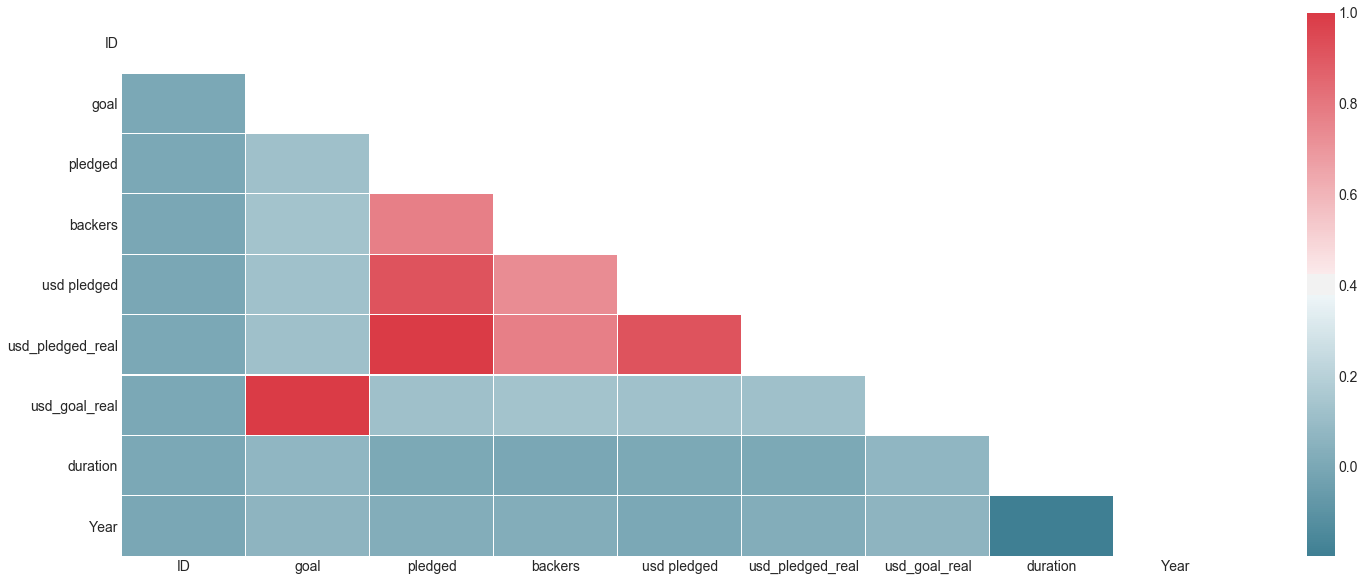

In [52]:
corr = df.corr()

#create a mask
import numpy as np
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#generate heatmap
sns.heatmap(corr, linewidths=.3, mask=mask, cmap=cmap);

In [53]:
#Firstly, let's remove highly correlated features (usd_pledged_real, usd_goal_real, usd pledged)
df = df.drop(['usd_pledged_real', 'usd pledged', 'usd_goal_real'], axis=1)

In [54]:
#let's also drop ID

df= df.drop(['ID'], axis=1)

In [55]:
#let's create dummy variable for size, main_category and state

df = pd.get_dummies(df, columns=['main_category', 'state'], drop_first=True)

Looking at the amount of features left after the EDA and cleaning, it feels like PCA isn't really necessary. 
However cluster analysis could give us a bit more understanding of the repartition, let's have a look

In [56]:
# creating a subdataset containing only the smaller kickstarters
dfs= df[df['size']=='small']

In [57]:
# create X - small dataset
Xs = dfs[['goal', 'backers', 'duration', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology','main_category_Theater']]

In [58]:
# let's find the best value for k, using the elbow method
from sklearn.cluster import KMeans

def plot_inertia_values_small(k_min, k_max):
    inertia_values = []
    k_values = range(k_min, k_max+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(Xs)
        inertia_values.append(kmeans.inertia_)

    fig, ax = plt.subplots()
    ax.plot(k_values, inertia_values)
    ax.set_title("Inertia values for different $k$")
    ax.set_xlabel("k")
    ax.set_ylabel("Inertia")
    #ax.set_ylim((0, 300))
    ax.set_xticks(k_values)
    plt.show()

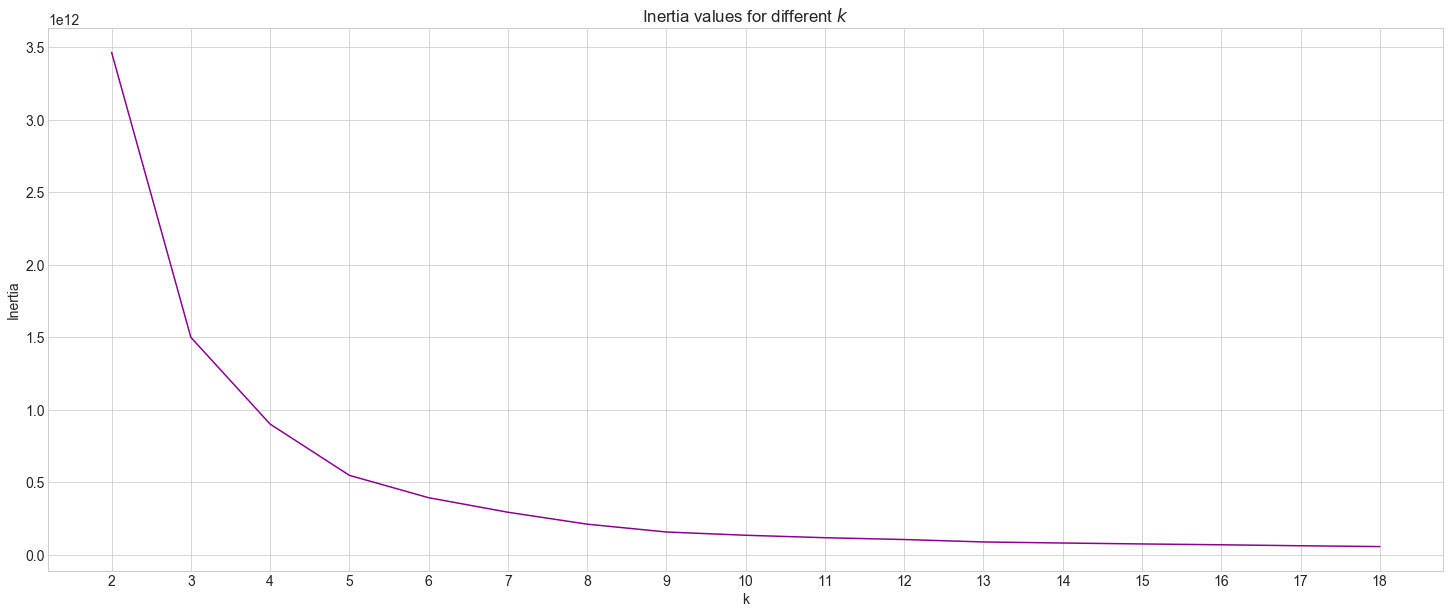

In [59]:
plot_inertia_values_small(k_min=2, k_max=18)

So k=3 looks good, and so does k=5...let's try 3 first

In [60]:
# let's fit for k=3

from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=3)
k_mean.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
# Labels for 3 Clusters
labels_3 = k_mean.labels_

/Users/guenerets/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


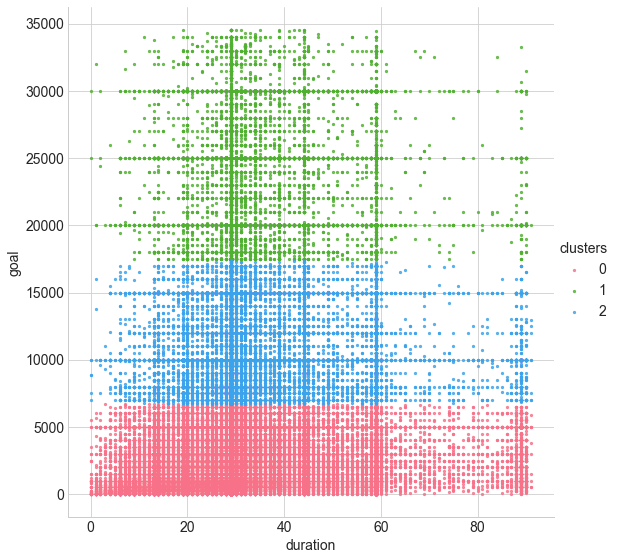

In [62]:
# visualising the cluster 
Xs['clusters']= labels_3

sns.lmplot(x='duration', y='goal', data=Xs, 
           hue='clusters', size=8, fit_reg=False, scatter_kws={"s": 5});

Not really seeing much...let's try with k=5

In [63]:
#refiting for k=5
k_mean = KMeans(n_clusters=5)
k_mean.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
# Labels for 5 Clusters
labels_5 = k_mean.labels_

/Users/guenerets/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


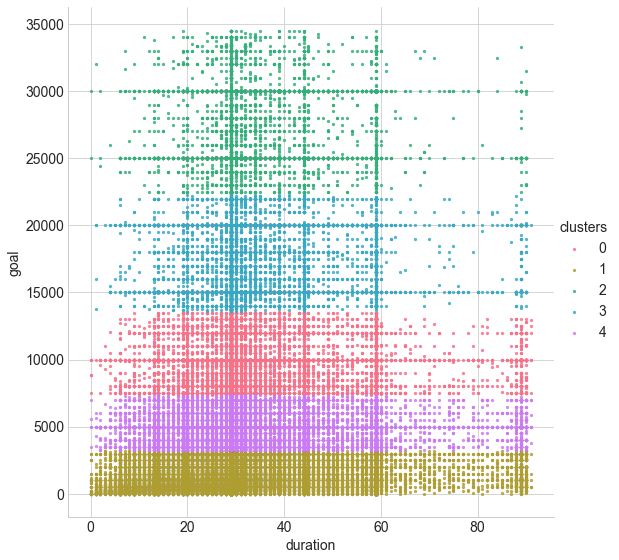

In [65]:
# visualising the cluster 
Xs['clusters']= labels_5

sns.lmplot(x='duration', y='goal', data=Xs, 
           hue='clusters', size=8, fit_reg=False, scatter_kws={"s": 5});                  

I can't honestly say either is best...it's unfortunate I can't calculate the silhouette score (but it kills my computer)

#### How about the big dataset?

In [66]:
# creating a subdataset containing only the bigger kickstarters
dfb= df[df['size']=='big']

In [67]:
# create X - big dataset
Xb = dfb[['goal', 'backers', 'duration', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology','main_category_Theater']]

In [68]:
# let's find the best value for k, using the elbow method
def plot_inertia_values_big(k_min, k_max):
    inertia_values = []
    k_values = range(k_min, k_max+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(Xb)
        inertia_values.append(kmeans.inertia_)

    fig, ax = plt.subplots()
    ax.plot(k_values, inertia_values)
    ax.set_title("Inertia values for different $k$")
    ax.set_xlabel("k")
    ax.set_ylabel("Inertia")
    #ax.set_ylim((0, 300))
    ax.set_xticks(k_values)
    plt.show()

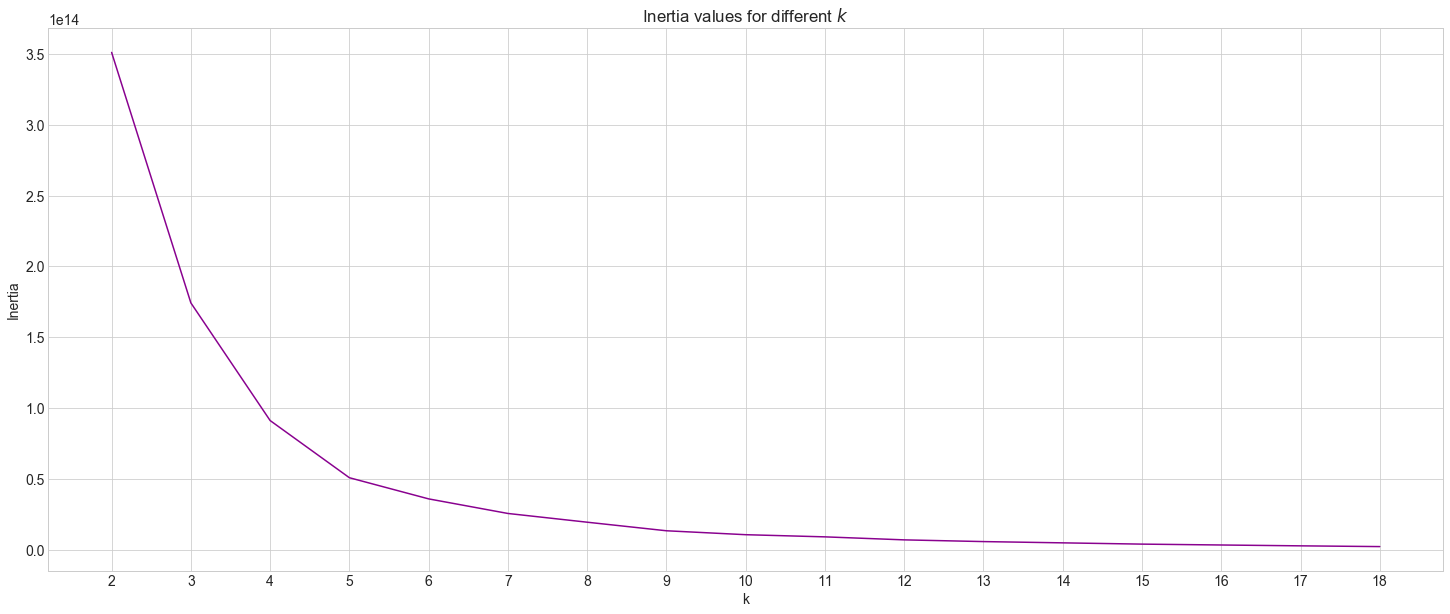

In [69]:
plot_inertia_values_big(k_min=2, k_max=18)

Just like the small dataset, 3 and 5 (and 4!) could be interesting. Starting with 3:

In [70]:
#Fiting for k=3
k_mean = KMeans(n_clusters=3)
k_mean.fit(Xb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
# Labels for 3 Clusters
labels_3 = k_mean.labels_

/Users/guenerets/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


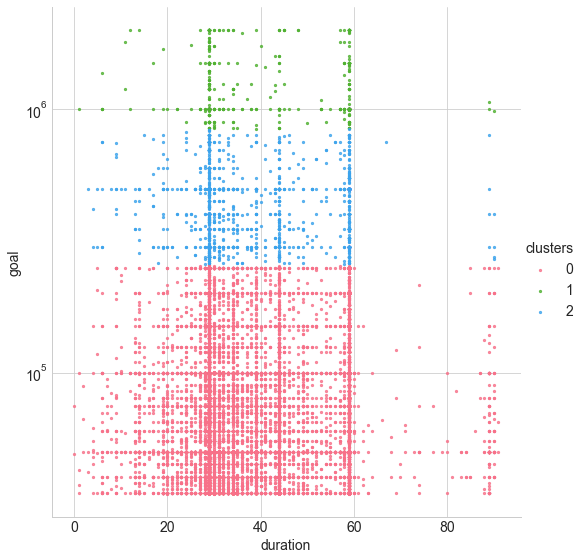

In [72]:
# visualising the cluster 
Xb['clusters']= labels_3

g= sns.lmplot(x='duration', y='goal', data=Xb, 
           hue='clusters', size=8, fit_reg=False, scatter_kws={"s": 5});
g.set(yscale="log");

I actually think that's pretty good, but let's see what it looks like with 4 clusters for good measure

In [73]:
#Fiting for k=4
k_mean = KMeans(n_clusters=4)
k_mean.fit(Xb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
# Labels for 4 Clusters
labels_4 = k_mean.labels_

/Users/guenerets/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


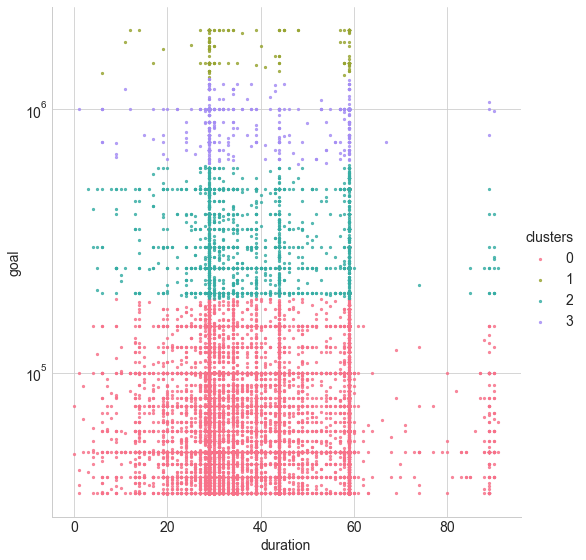

In [75]:
# visualising the cluster 
Xb['clusters']= labels_4

g= sns.lmplot(x='duration', y='goal', data=Xb, 
           hue='clusters', size=8, fit_reg=False, scatter_kws={"s": 5});
g.set(yscale="log");

Yes, that looks better!

Learnings from this are that we could segment the dataset in 6 to 10 subsets that seem to behave differently...but I reckon I'll stick with 2 for now

## b- Logistic regression for prediction of success ('state')

#### Looking at the small subset first

In [76]:
dfs.columns

Index(['name', 'deadline', 'goal', 'launched', 'pledged', 'backers',
       'duration', 'size', 'Year', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'state_successful'],
      dtype='object')

In [77]:
# Creating features and target

from sklearn.model_selection import train_test_split
Xs_reg = dfs[['goal', 'backers', 'duration', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater']]
ys_reg = dfs['state_successful']

In [78]:
#perform logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
Xs_reg_train, Xs_reg_test, ys_reg_train, ys_reg_test = train_test_split(Xs_reg,
                                                    ys_reg,
                                                    test_size=0.25,
                                                    random_state=42)
lr.fit(Xs_reg_train, ys_reg_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
# making actual predictions
predictions_s_reg = lr.predict(Xs_reg_test)

In [80]:
# create a classification report

from sklearn.metrics import classification_report, roc_curve, auc
print(classification_report(ys_reg_test,predictions_s_reg))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92     31981
          1       0.93      0.87      0.90     25956

avg / total       0.91      0.91      0.91     57937



In [81]:
# let's look at the confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ys_reg_test, predictions_s_reg))

[[30222  1759]
 [ 3364 22592]]


So it's looking pretty good. False positives are slightly higher than false negatives, which suggest the model is slightly biased towards predicting failure - also visible through the slightly lower recall % for successful state

In [82]:
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(Xs_reg_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(ys_reg_test, preds)


In [83]:
# what is my roc score?
roc_auc = auc(fpr, tpr)
roc_auc

0.9620812731750416

Again, respectable score seeing that it's the first iteration

Text(0.5,0,'False Positive Rate')

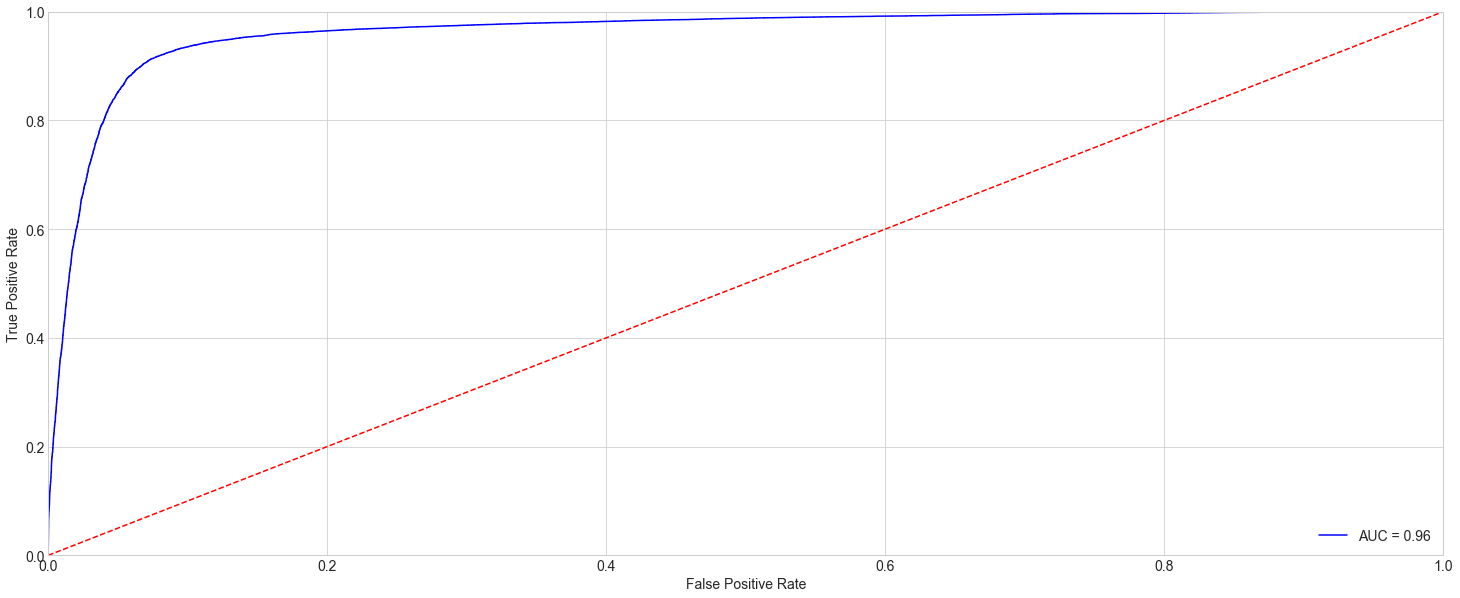

In [84]:
# let's plot

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [85]:
# let's try to optimise using regularisation

from sklearn.model_selection import GridSearchCV, StratifiedKFold


grid = GridSearchCV(LogisticRegression(),
                    param_grid={"penalty": ["l1"],
                                "C": [0.0001, 0.001, 0.01]},
                    scoring="roc_auc",
                    cv=StratifiedKFold(5))

grid.fit(Xs_reg_train, ys_reg_train);

In [86]:
grid.best_score_

0.9321800096401567

In [87]:
grid.best_params_

{'C': 0.0001, 'penalty': 'l1'}

So our best value for C is 0.0001. Let's fit the regularised model and see if it does any better

In [88]:
lr_2 = LogisticRegression(C=0.0001, penalty='l1')

lr_2.fit(Xs_reg_train, ys_reg_train)

ys_reg_pred_2 = lr_2.predict(Xs_reg_test)

print(classification_report(ys_reg_test,predictions_s_reg))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92     31981
          1       0.93      0.87      0.90     25956

avg / total       0.91      0.91      0.91     57937



In [89]:
print(confusion_matrix(ys_reg_test, predictions_s_reg))

[[30222  1759]
 [ 3364 22592]]


Exact same results! Is that because C is so small that it makes virtually no difference? Or did I mess something up?

#### Now let's look at the bigger kickstarters

In [90]:
# creating features and target
Xb_reg = dfb[['goal', 'backers', 'duration', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater']]
yb_reg = dfb['state_successful']

In [91]:
#perform logistic regression

lr = LogisticRegression()
Xb_reg_train, Xb_reg_test, yb_reg_train, yb_reg_test = train_test_split(Xb_reg,
                                                    yb_reg,
                                                    test_size=0.25,
                                                    random_state=42)
lr.fit(Xb_reg_train, yb_reg_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
# making actual predictions
predictions_b_reg = lr.predict(Xb_reg_test)

In [93]:
# create a classification report
print(classification_report(yb_reg_test,predictions_b_reg))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      5928
          1       0.92      0.80      0.85      1393

avg / total       0.95      0.95      0.95      7321



In [94]:
# let's look at the confusion matrix
print(confusion_matrix(yb_reg_test, predictions_b_reg))

[[5835   93]
 [ 284 1109]]


Here too, we seem to have slightly more false positives than false negative, possibly due to the class imbalance, and the higher failure rate for big kickstarters

## c- Random Forest/Decision Trees for  success ('state')

### So, we have a pretty good model for both small and big datasets. But what are the most important features to predict success?

#### As usual, let's start with our small dataset

In [95]:
# define X and y

from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()

Xs_dt = dfs[['goal', 'backers', 'duration', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater']]
ys_dt = dfs['state_successful']


In [96]:
# Fits the model
DT_model.fit(Xs_dt, ys_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
#let's evaluate the tree

from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT_model, Xs_dt, ys_dt, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.90639454 0.90416355 0.90599031 0.90786866 0.90797638], Average AUC 0.9064786884641007


Not too bad...let's see if random forest do better

In [98]:
# let's fit a random forest classifier

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20)
    
RF_model.fit(Xs_dt, ys_dt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
# extract the important features
features = Xs_dt.columns
feature_importances = RF_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
1,backers,0.757585
0,goal,0.146886
2,duration,0.060020
11,main_category_Music,0.005522
9,main_category_Games,0.004307
7,main_category_Film & Video,0.003622
15,main_category_Theater,0.003367
6,main_category_Fashion,0.003012
13,main_category_Publishing,0.002735
5,main_category_Design,0.002735


In [100]:
# evaluate the RF model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model, Xs_dt, ys_dt, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.96890198 0.96853848 0.96835331], Average AUC 0.9685979209775667


In [101]:
# Optimising n:
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, Xs_dt, ys_dt, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

n trees: 1, CV AUC [0.90345986 0.90376714 0.90255681], Average AUC 0.9032612696645771
n trees: 11, CV AUC [0.96533283 0.96502683 0.96547379], Average AUC 0.9652778176877793
n trees: 21, CV AUC [0.96935925 0.96898402 0.9688168 ], Average AUC 0.9690533570446869
n trees: 31, CV AUC [0.97015255 0.97030175 0.9705549 ], Average AUC 0.9703364002524532
n trees: 41, CV AUC [0.97140629 0.97087188 0.97082728], Average AUC 0.9710351500350645
n trees: 51, CV AUC [0.971462   0.97145654 0.97144893], Average AUC 0.971455823084355
n trees: 61, CV AUC [0.97201123 0.97194127 0.97183777], Average AUC 0.9719300899915165
n trees: 71, CV AUC [0.97240469 0.97208671 0.97231827], Average AUC 0.9722698923089889
n trees: 81, CV AUC [0.97252051 0.9723349  0.97249174], Average AUC 0.9724490513648422
n trees: 91, CV AUC [0.9727332  0.97242692 0.9725139 ], Average AUC 0.9725580046834811


So n = 20 isn't a bad choice- we only see marginal gains on the AUC for higher values- and we could even go slighty lower, as n=11 already gives us 0.96

#### However, the model relies too much on the number of backers. Let's see what our decision tree looks like when taking backers out 

In [102]:
# define X and y
Xs_dt_2 = dfs[['goal', 'duration', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater']]
ys_dt_2 = dfs['state_successful']

In [103]:
# Fits the model
DT_model.fit(Xs_dt_2, ys_dt_2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [104]:
#let's evaluate the tree
scores = cross_val_score(DT_model, Xs_dt_2, ys_dt_2, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.62007298 0.62468492 0.62444251 0.62673121 0.62334843], Average AUC 0.623856010587223


Not surprisingly we've lost quite a bit of accuracy here. Let's see how random forest perform

In [105]:
# let's fit a random forest classifier
RF_model.fit(Xs_dt_2, ys_dt_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
# let's evaluate the RF
scores = cross_val_score(RF_model, Xs_dt_2, ys_dt_2, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.63337868 0.63702489 0.63323935], Average AUC 0.6345476410345713


Not much better than a single decision tree...let's see if n can be optimised

In [107]:
# What is the best n?
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, Xs_dt_2, ys_dt_2, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

n trees: 1, CV AUC [0.60834572 0.60898037 0.60858577], Average AUC 0.608637288798691
n trees: 11, CV AUC [0.63224629 0.63489542 0.63192312], Average AUC 0.6330216097620123
n trees: 21, CV AUC [0.63377575 0.63656862 0.63327294], Average AUC 0.6345391024151339
n trees: 31, CV AUC [0.63417607 0.63718321 0.63415674], Average AUC 0.6351720074814041
n trees: 41, CV AUC [0.63501198 0.63692544 0.63434605], Average AUC 0.6354278228759616
n trees: 51, CV AUC [0.634572   0.63761478 0.63445277], Average AUC 0.6355465173750752
n trees: 61, CV AUC [0.63504098 0.63746631 0.63499746], Average AUC 0.6358349182580404
n trees: 71, CV AUC [0.63517796 0.63742293 0.63454666], Average AUC 0.6357158521529424
n trees: 81, CV AUC [0.63494934 0.63741761 0.6344564 ], Average AUC 0.635607783321432
n trees: 91, CV AUC [0.63515471 0.63746469 0.63417662], Average AUC 0.6355986744185131


Not really...Let's see what features are the most important

In [108]:
# extract the important features
features = Xs_dt_2.columns
feature_importances = RF_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,goal,0.564508
1,duration,0.298677
10,main_category_Music,0.022845
5,main_category_Fashion,0.017745
14,main_category_Theater,0.016319
12,main_category_Publishing,0.012669
13,main_category_Technology,0.012653
2,main_category_Crafts,0.011638
7,main_category_Food,0.009144
3,main_category_Dance,0.008271


As expected, goal and duration are the most important features now. Interestingly the order of categories has changed slightly

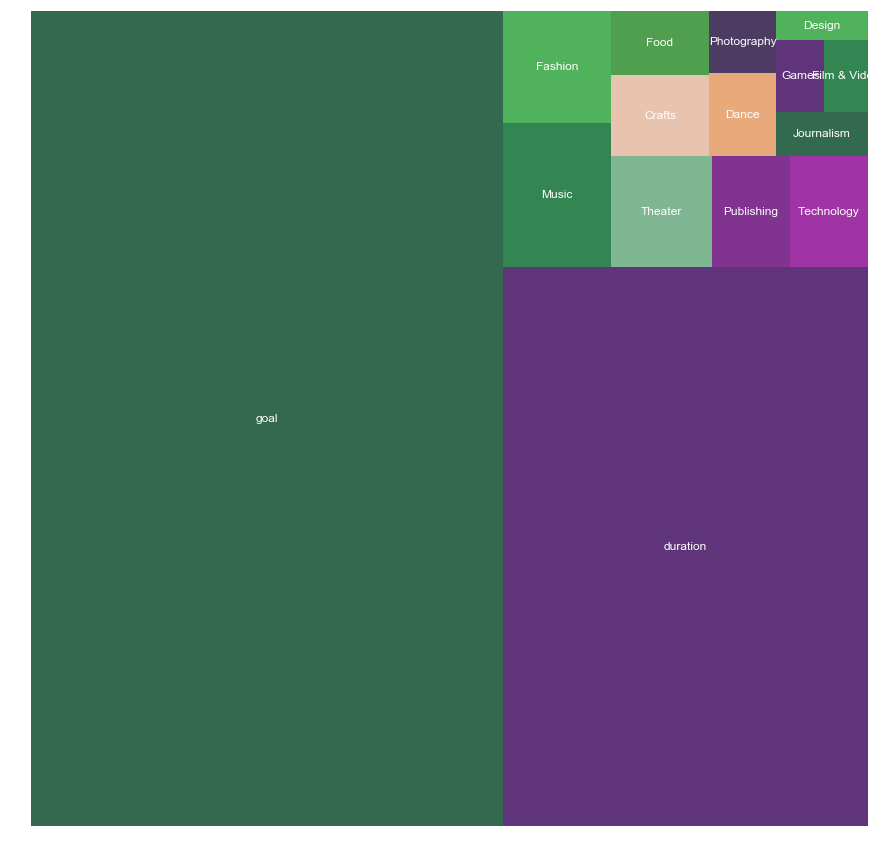

In [110]:
# let's visualise this nicely with a treemap

#first- cleaning up the rows
features_df.loc[:, 'Features'].replace(regex=True, to_replace="main_category_", value="", inplace=True)

#create treemap
import squarify
plt.figure(figsize=(15, 15))
plt.rcParams['text.color'] = 'white'
plt.rcParams.update({'font.size': 12})
squarify.plot(sizes=features_df['Importance Score'], label=features_df['Features'], alpha=.8, 
              color=['#014422', '#38025B','#006727', '#25A032', '#60A677',  '#610073',
                    '#89018F', '#E3B69D', '#248823','#E3955A', '#200A3C'] )
plt.axis('off')
plt.show()

#### And now for the big dataset

In [111]:
# define X and y
Xb_dt = dfb[['goal', 'backers', 'duration', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater']]
yb_dt = dfb['state_successful']


In [112]:
# Fits the model
DT_model.fit(Xb_dt, yb_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
#let's evaluate the tree
scores = cross_val_score(DT_model, Xs_dt, ys_dt, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.90584459 0.90417165 0.90652047 0.908176   0.90723656], Average AUC 0.9063898548200188


Again, not so bad- can random forest do any better?

In [114]:
# let's fit a random forest classifier
RF_model.fit(Xb_dt, yb_dt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
# evaluate the RF model
scores = cross_val_score(RF_model, Xb_dt, yb_dt, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.97592813 0.97715585 0.98130302], Average AUC 0.9781289983078811


We do significantly better here...no need to optimise n further

In [117]:
# extract the important features
features = Xb_dt.columns
feature_importances = RF_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
1,backers,0.843644
0,goal,0.074905
2,duration,0.051621
9,main_category_Games,0.007439
7,main_category_Film & Video,0.003824
14,main_category_Technology,0.003792
5,main_category_Design,0.003241
8,main_category_Food,0.003047
13,main_category_Publishing,0.001896
6,main_category_Fashion,0.001458


Backers play an even more important role for bigger kickstarters. Again, pretty intuitive that the higher the goal, the more backers you will need.

#### Let's take backers out to see how it impacts it all

In [118]:
# define X and y
Xb_dt_2 = dfb[['goal', 'duration', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater']]
yb_dt_2 = dfb['state_successful']

In [119]:
# Fits the decision tree model
DT_model.fit(Xb_dt_2, yb_dt_2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
#Evaluate the tree
scores = cross_val_score(DT_model, Xb_dt_2, yb_dt_2, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.62930518 0.63499521 0.62068596 0.62913301 0.64050795], Average AUC 0.630925459521944


We see the same sort of drop in accuracy than for the smaller dataset

In [121]:
# let's fit a random forest classifier
RF_model.fit(Xb_dt_2, yb_dt_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
# evaluating our RF classifier
bscores = cross_val_score(model, Xb_dt_2, yb_dt_2, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.62930518 0.63499521 0.62068596 0.62913301 0.64050795], Average AUC 0.630925459521944


Not much better than a single decision tree...

In [123]:
#Can we optimise n?
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, Xb_dt_2, yb_dt_2, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

n trees: 1, CV AUC [0.61164223 0.61291483 0.60587833], Average AUC 0.6101451328174091
n trees: 11, CV AUC [0.65182743 0.65353208 0.65855273], Average AUC 0.6546374130418157
n trees: 21, CV AUC [0.65557975 0.65874415 0.66001335], Average AUC 0.6581124166862641
n trees: 31, CV AUC [0.6597663  0.65780012 0.65976249], Average AUC 0.659109638481637
n trees: 41, CV AUC [0.66012204 0.66098515 0.6628849 ], Average AUC 0.6613306977078711
n trees: 51, CV AUC [0.6620752  0.66199794 0.66521197], Average AUC 0.6630950369964208
n trees: 61, CV AUC [0.66102455 0.66096413 0.66314211], Average AUC 0.6617102645119575
n trees: 71, CV AUC [0.66339495 0.66196142 0.6629151 ], Average AUC 0.6627571589192358
n trees: 81, CV AUC [0.6638362  0.66170087 0.66467579], Average AUC 0.6634042867236839
n trees: 91, CV AUC [0.66320917 0.6635752  0.66326646], Average AUC 0.6633502759997832


In [124]:
# extract the important features
features = Xb_dt_2.columns
feature_importances = RF_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,goal,0.502556
1,duration,0.405268
8,main_category_Games,0.014299
7,main_category_Food,0.012170
13,main_category_Technology,0.011182
4,main_category_Design,0.011056
6,main_category_Film & Video,0.007741
12,main_category_Publishing,0.007343
14,main_category_Theater,0.006940
10,main_category_Music,0.006220


This performs slightly better than in the case of the smaller dataset- but with 2 features accompting for 90% of the importance.

So when your kickstarter reaches a certain size, category becomes irrelevant

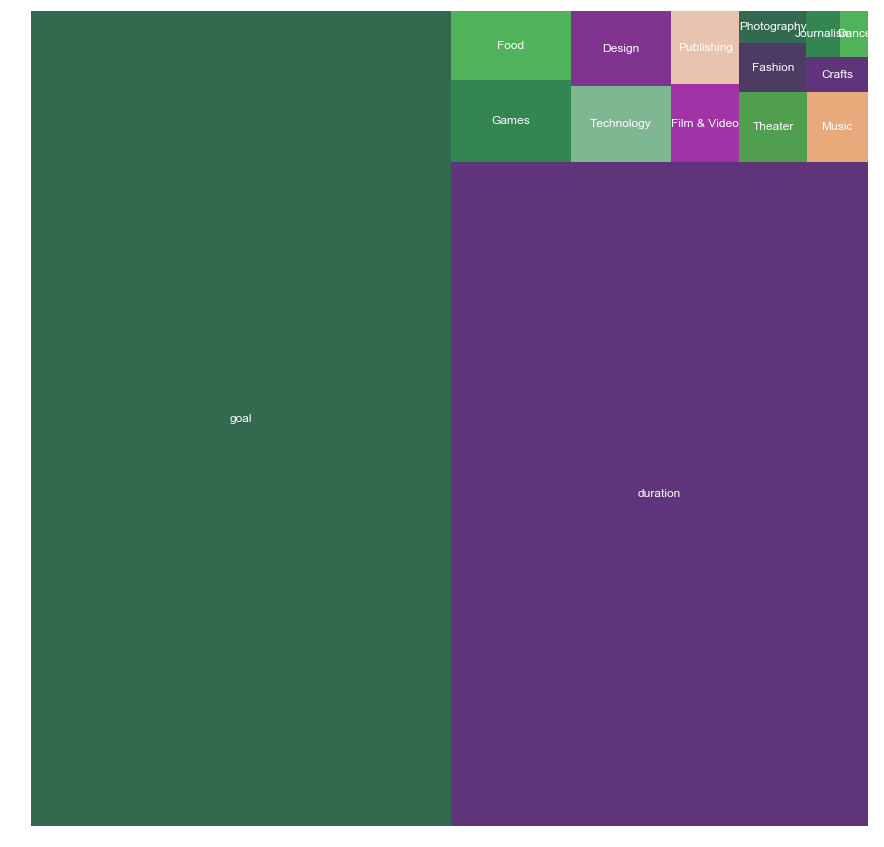

In [125]:
# let's do another treemap

#first- cleaning up the rows
features_df.loc[:, 'Features'].replace(regex=True, to_replace="main_category_", value="", inplace=True)

#create treemap
plt.figure(figsize=(15, 15))
plt.rcParams['text.color'] = 'white'
plt.rcParams.update({'font.size': 12})
squarify.plot(sizes=features_df['Importance Score'], label=features_df['Features'], alpha=.8, 
              color=['#014422', '#38025B','#006727', '#25A032', '#60A677',  '#610073',
                    '#89018F', '#E3B69D', '#248823','#E3955A', '#200A3C'] )
plt.axis('off')
plt.show()

# 3: Next steps/ further considerations

Build tool- for given category and goal return the optimal time and min number of backers

time series analysis- if I could get more data, I'd like to look at trends- how to know you're on track based on number of backers/ % of goal you've reached at 25, 50, 75% of your goal